# Setting up a structure

It is possible, using ASE (but pymatgen as well), to read a QE in/out file and load a given crystal structure. 
It is possible also to create it from scratch, but this is object of a dedicated ASE tutorial (https://wiki.fysik.dtu.dk/ase/gettingstarted/tut01_molecule/molecule.html)

In [1]:
from ase.io.espresso import read_espresso_in

In [2]:
Silicon = read_espresso_in('silicon.in')

In [3]:
Silicon

Atoms(symbols='Si2', pbc=True, cell=[[-2.6988037626030605, 0.0, 2.6988037626030605], [0.0, 2.6988037626030605, 2.6988037626030605], [-2.6988037626030605, 2.6988037626030605, 0.0]], initial_magmoms=...)

The "Silicon" variable contains all the informations needed to store the structure in the AiiDA database

In [4]:
%aiida
from aiida import orm

In [5]:
structure = orm.StructureData(ase=Silicon) #pk = 77395

In [6]:
#structure.store()

## structure from scratch for bulk hBN:

In [7]:
from ase import Atoms

alat = 2.4955987320 # Angstrom
the_cell = [[1.000000*alat,   0.000000,   0.000000],
                [-0.500000*alat,  0.866025*alat,   0.000000],
                [0.000000,   0.000000,  6.4436359260]]

atoms = Atoms('BNNB', [(1.2477994910, 0.7204172280, 0.0000000000),
    (-0.0000001250, 1.4408346720, 0.0000000000),
    (1.2477994910, 0.7204172280, 3.2218179630),
    (-0.0000001250,1.4408346720, 3.2218179630)],
    cell = [1,1,1])

atoms.set_cell(the_cell, scale_atoms=False)
atoms.set_pbc([True,True,True])

StructureData = DataFactory('structure')
structure = StructureData(ase=atoms)

#structure.store()

<AxesSubplot:>

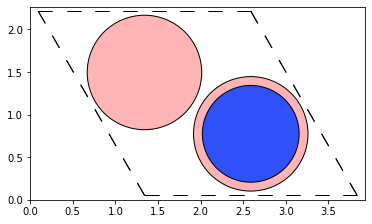

In [16]:
from ase.visualize.plot import plot_atoms

plot_atoms(atoms, radii=0.8, rotation=('0x,0y,0z'))

## adding different species --> see starfire routine

# Store pseudopotentials

The command is:

    aiida-pseudo install family <ARCHIVE> <LABEL> -P pseudo.upf

refer to https://aiida-pseudo.readthedocs.io/en/latest/howto.html

When you use protocols, you have to provide families which have one. SSSP or PseudoDojo. 
If you want to use another family, for example sg15, you generate the builder protocols with SSSP or PseudoDojo, then:
    
    family = orm.load_group("sg15")
    builder.<sublevels_up_to .pw>.pseudos = family.get_pseudos(structure=structure) 


# Group creation and usage

Groups are a powerful tool in AiiDA, they allow to group calculations and to easy query them. To see examples of query and creation/management of groups, see: https://aiida.readthedocs.io/projects/aiida-core/en/latest/howto/data.html?highlight=groups.

In [45]:
new_group = orm.Group('prova')

In [51]:
try:
    new_group.store()
except:
    print("The group '{}' already exists!".format(new_group.label))

The group 'prova' already exists!


You can add nodes to the group, both from here or from the command line. Here you can load a node and add to the group
    
    node = orm.load_node(pk or uuid)
    new_group.add_nodes(node)